# Cars Prices Prediction
Attempting to fit cars prices, using the [vehicle-dataset-from-cardekho (Kaggle)](https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho/data)

In [ ]:
!pip install -r requirements.txt

In [2]:
# !mkdir data

In [3]:
# !curl -L -o ./data/vehicle-dataset-from-cardekho.zip https://www.kaggle.com/api/v1/datasets/download/nehalbirla/vehicle-dataset-from-cardekho
# !unzip -d ./data/ ./data/vehicle-dataset-from-cardekho.zip

## 0. Imports

In [4]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")


## 1. Introducing the Cars prices dataset -- Exploratory Data Analysis (EDA)

In [5]:
df = pd.read_csv('./data/car details v4.csv')

In [6]:
df.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0


In [7]:
df.describe()

,Price,Year,Kilometer,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
count,2.059000e+03,2059.000000,2.059000e+03,1995.000000,1995.000000,1995.000000,1995.000000,1946.000000
mean,1.702992e+06,2016.425449,5.422471e+04,4280.860652,1767.991980,1591.735338,5.306266,52.002210
std,2.419881e+06,3.363564,5.736172e+04,442.458507,135.265825,136.073956,0.822170,15.110198
min,4.900000e+04,1988.000000,0.000000e+00,3099.000000,1475.000000,1165.000000,2.000000,15.000000
25%,4.849990e+05,2014.000000,2.900000e+04,3985.000000,1695.000000,1485.000000,5.000000,41.250000
50%,8.250000e+05,2017.000000,5.000000e+04,4370.000000,1770.000000,1545.000000,5.000000,50.000000
75%,1.925000e+06,2019.000000,7.200000e+04,4629.000000,1831.500000,1675.000000,5.000000,60.000000
max,3.500000e+07,2022.000000,2.000000e+06,5569.000000,2220.000000,1995.000000,8.000000,105.000000


### Cleaning and Preprocessing
Here we check for and handle missing values, and process text-based numeric columns.

In [8]:
df.shape

(2059, 20)

In [9]:
df.duplicated().sum()

0

In [10]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 Make                    0
Model                   0
Price                   0
Year                    0
Kilometer               0
Fuel Type               0
Transmission            0
Location                0
Color                   0
Owner                   0
Seller Type             0
Engine                 80
Max Power              80
Max Torque             80
Drivetrain            136
Length                 64
Width                  64
Height                 64
Seating Capacity       64
Fuel Tank Capacity    113
dtype: int64


In [11]:
def extract_numeric(value):
    if pd.isna(value):
        return np.nan
    return float(re.search(r'\d+(\.\d+)?', str(value)).group())

df['Engine'] = df['Engine'].str.extract('(\d+)').astype(float)
df['Max Power'] = df['Max Power'].apply(extract_numeric)
df['Max Torque'] = df['Max Torque'].apply(extract_numeric)

numeric_columns = df.select_dtypes(include=[np.number]).columns
categorical_columns = df.select_dtypes(include=['object']).columns

numeric_imputer = SimpleImputer(strategy='median')
df[numeric_columns] = numeric_imputer.fit_transform(df[numeric_columns])

categorical_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_columns] = categorical_imputer.fit_transform(df[categorical_columns])

print("Missing values after imputation:\n", df.isnull().sum())

Missing values after imputation:
 Make                  0
Model                 0
Price                 0
Year                  0
Kilometer             0
Fuel Type             0
Transmission          0
Location              0
Color                 0
Owner                 0
Seller Type           0
Engine                0
Max Power             0
Max Torque            0
Drivetrain            0
Length                0
Width                 0
Height                0
Seating Capacity      0
Fuel Tank Capacity    0
dtype: int64


### Feature Engineering
We create new features and encode categorical variables to prepare for modeling.

In [12]:
# Convert 'Year' to age of the car
current_year = 2024
df['Age'] = current_year - df['Year']
df.drop('Year', axis=1, inplace=True)

In [13]:
df['Transmission'].value_counts()

Manual       1133
Automatic     926
Name: Transmission, dtype: int64

Let's convert the `Transmission` feature from categorical to binary

In [14]:
df['IsManualTransmission'] = df['Transmission'].apply(lambda x: x == 'Manual')
df.drop('Transmission', axis=1, inplace=True)

In [15]:
df['Fuel Type'].value_counts()

Diesel          1049
Petrol           942
CNG               50
Electric           7
LPG                5
Hybrid             3
CNG + CNG          1
Petrol + CNG       1
Petrol + LPG       1
Name: Fuel Type, dtype: int64

In [16]:
# Convert all fuel types that have less than 7 cars as "Other"
fuel_types_to_keep = df["Fuel Type"].value_counts()[df["Fuel Type"].value_counts() >= 7].index
df.loc[~df["Fuel Type"].isin(fuel_types_to_keep), "Fuel Type"] = "Other"

In [17]:
luxury_brands = ['Mercedes-Benz', 'BMW', 'Audi', 'Lexus', 'Jaguar', 'Land Rover', 'Porsche']
df['LuxuryBrand'] = df['Make'].isin(luxury_brands)

df['AgeBin'] = pd.cut(df['Age'], bins=[0, 3, 6, 10, 20, 100], labels=['New', 'Recent', 'Mid-age', 'Old', 'Very Old'])

### Processed dataset

In [18]:
df.head()

,Make,Model,Price,Kilometer,Fuel Type,Location,Color,Owner,Seller Type,Engine,...,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,Age,IsManualTransmission,LuxuryBrand,AgeBin
0,Honda,Amaze 1.2 VX i-VTEC,505000.0,87150.0,Petrol,Pune,Grey,First,Corporate,1198.0,...,FWD,3990.0,1680.0,1505.0,5.0,35.0,7.0,True,False,Mid-age
1,Maruti Suzuki,Swift DZire VDI,450000.0,75000.0,Diesel,Ludhiana,White,Second,Individual,1248.0,...,FWD,3995.0,1695.0,1555.0,5.0,42.0,10.0,True,False,Mid-age
2,Hyundai,i10 Magna 1.2 Kappa2,220000.0,67000.0,Petrol,Lucknow,Maroon,First,Individual,1197.0,...,FWD,3585.0,1595.0,1550.0,5.0,35.0,13.0,True,False,Old
3,Toyota,Glanza G,799000.0,37500.0,Petrol,Mangalore,Red,First,Individual,1197.0,...,FWD,3995.0,1745.0,1510.0,5.0,37.0,5.0,True,False,Recent
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000.0,69000.0,Diesel,Mumbai,Grey,First,Individual,2393.0,...,RWD,4735.0,1830.0,1795.0,7.0,55.0,6.0,True,False,Recent


## 2. Visualizations

### Distribution of Car Prices

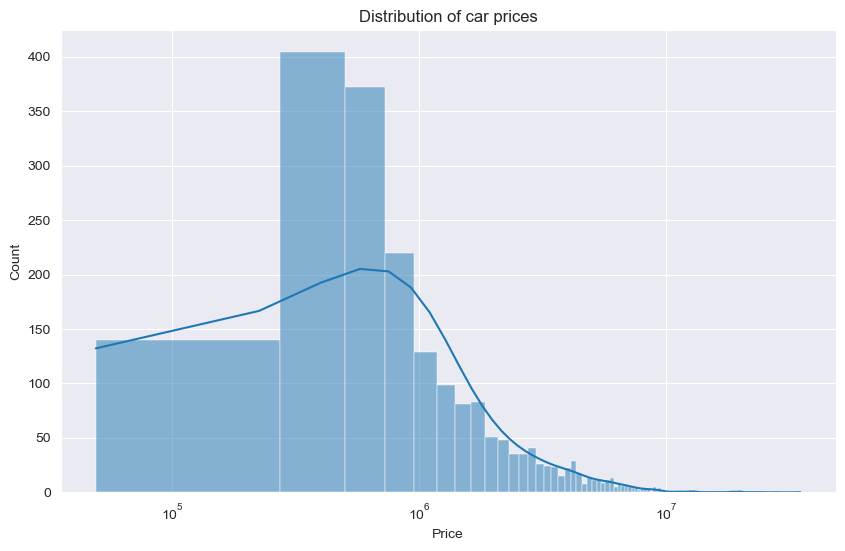

In [19]:
fig = plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], kde=True)
plt.xscale("log")

plt.title("Distribution of car prices")
plt.show()

The price distribution is right-skewed, indicating more lower-priced cars with some high-priced outliers.

### Examining Correlations to the target feature:

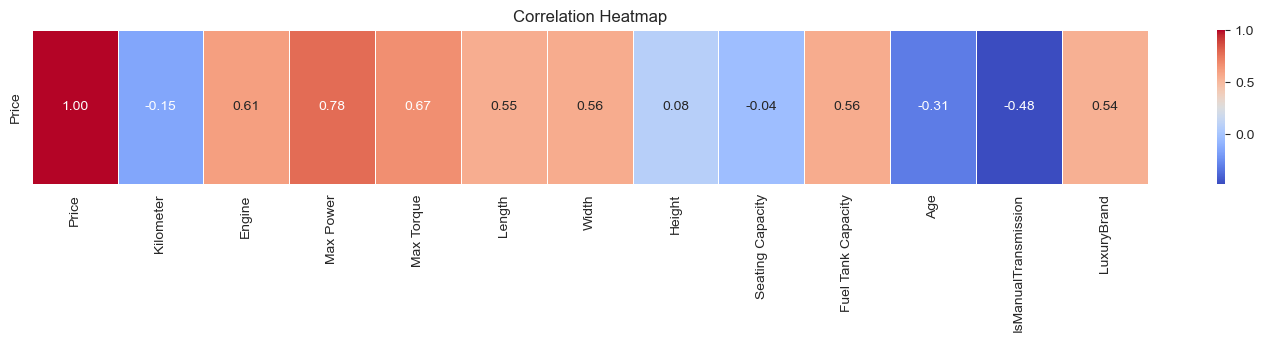

In [20]:
dtf_corr = df.corr(method="pearson").loc[["Price"]]
fig, ax = plt.subplots(figsize=(18,2))
sns.heatmap(dtf_corr, annot=True, fmt='.2f', cmap="coolwarm", cbar=True, linewidths=0.5, ax=ax)
plt.title('Correlation Heatmap')
plt.show()

There are strong correlations between Price and features like Engine capacity, Max Power, and Max Torque.

### Price vs Key Features Scatter Plots

These scatter plots show how car prices relate to key features like mileage, age, engine capacity, and power.

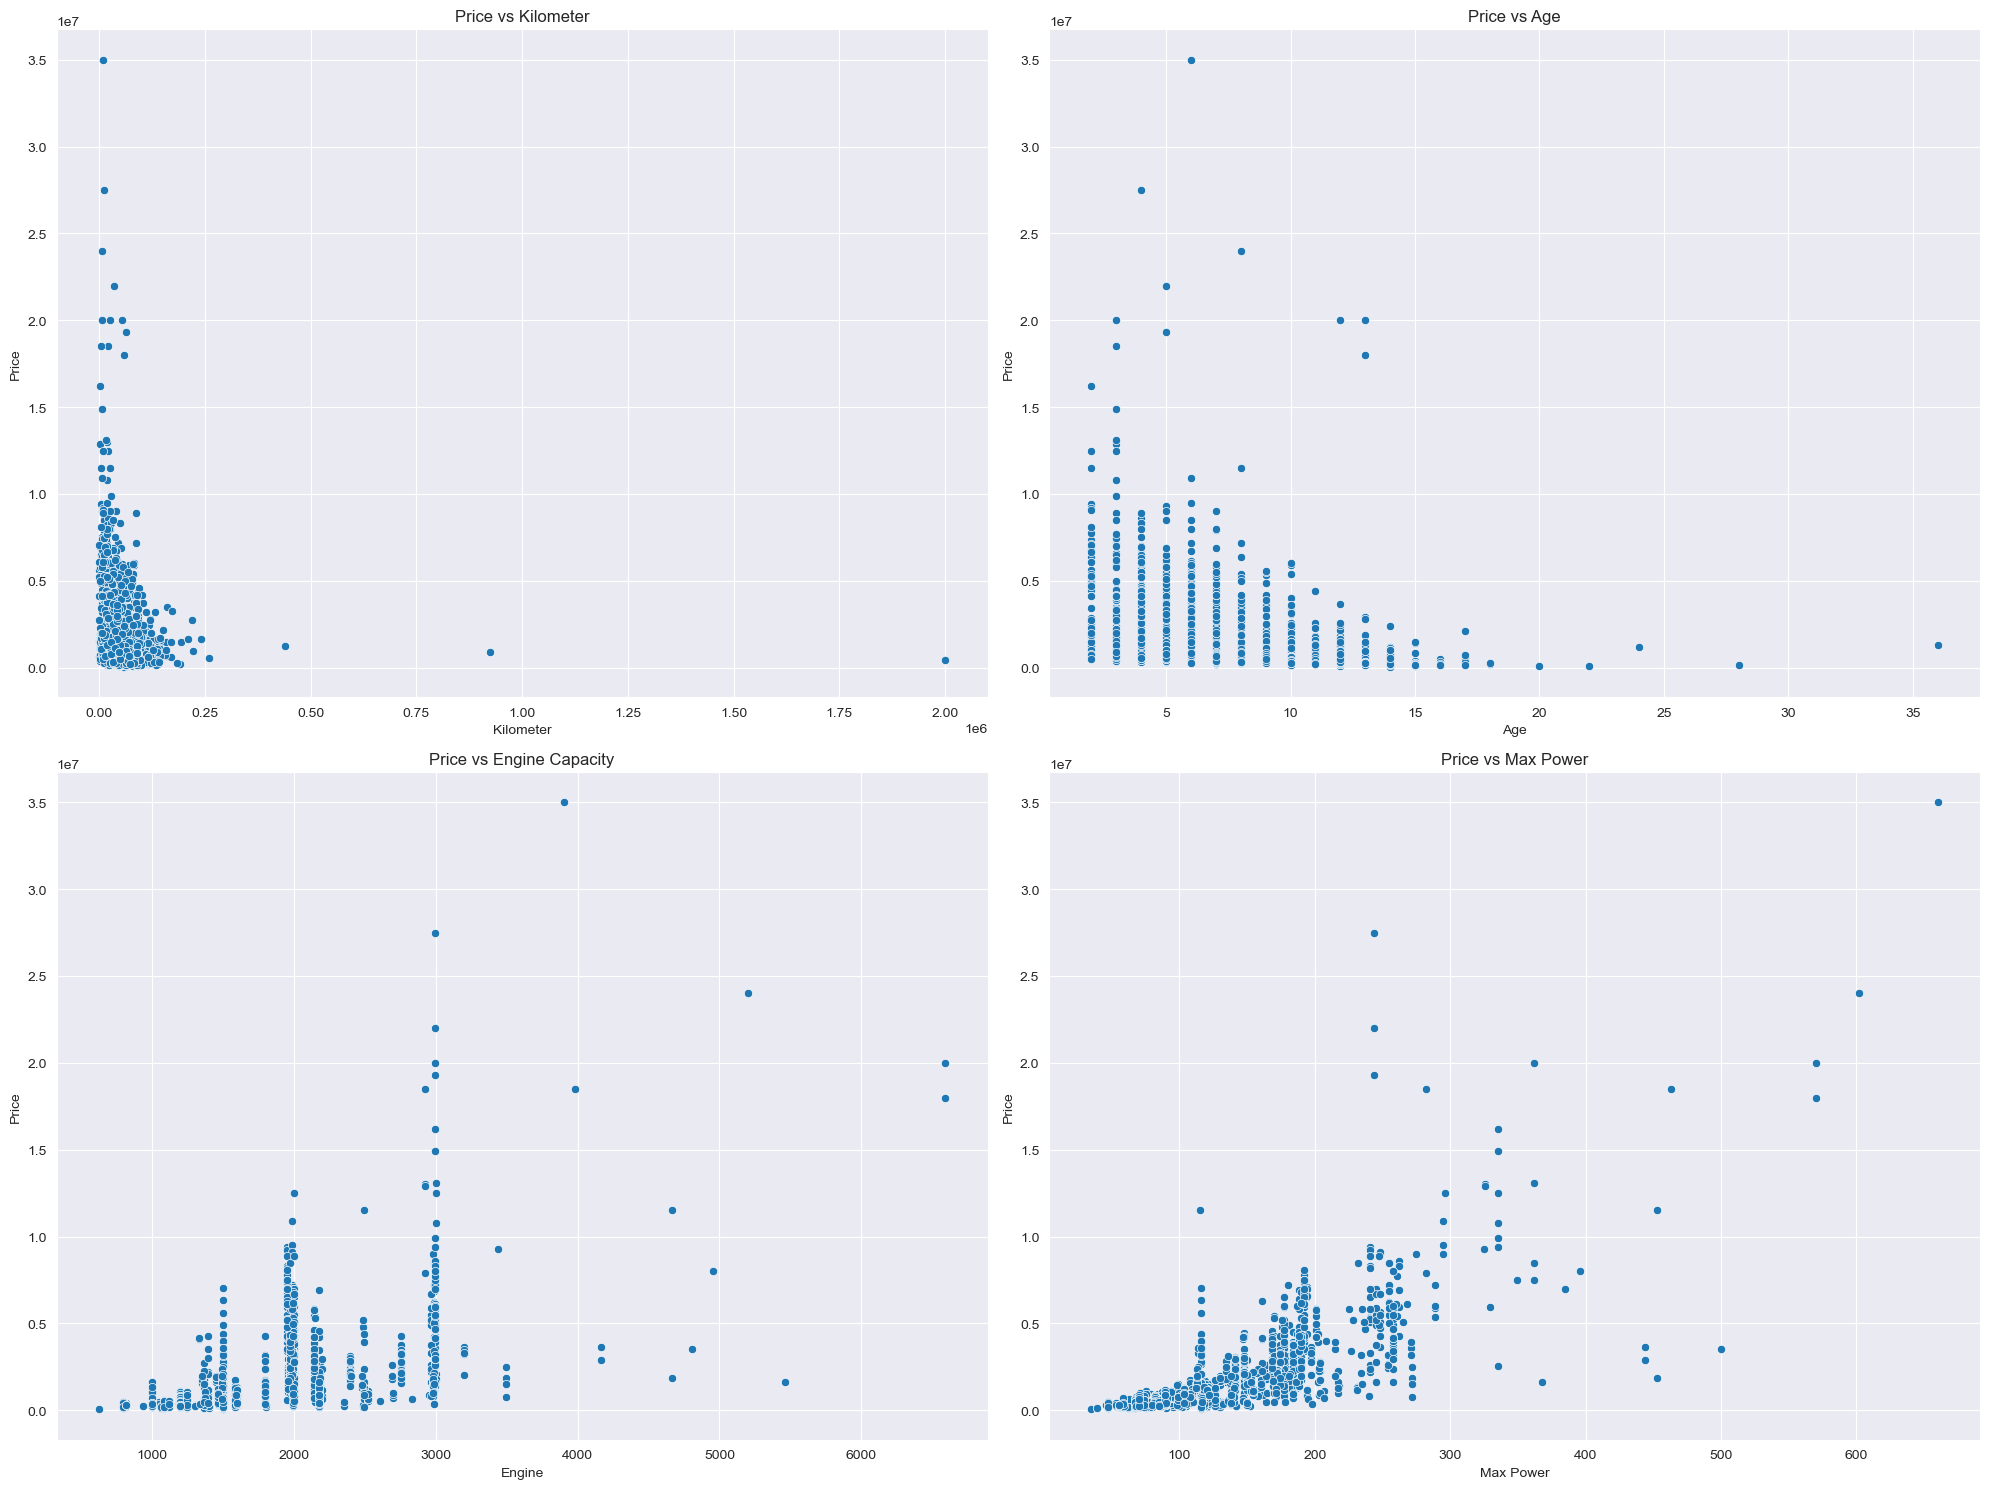

In [21]:
fig, axes = plt.subplots(2, 2, figsize=(20, 15))
sns.scatterplot(x='Kilometer', y='Price', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Price vs Kilometer')
sns.scatterplot(x='Age', y='Price', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Price vs Age')
sns.scatterplot(x='Engine', y='Price', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Price vs Engine Capacity')
sns.scatterplot(x='Max Power', y='Price', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Price vs Max Power')
plt.tight_layout()
plt.show()

Age and Kilometer have negative correlations with Price, as expected.

### Price by Categorical Features
These box plots illustrate how car prices vary across different categories such as make and transmission.

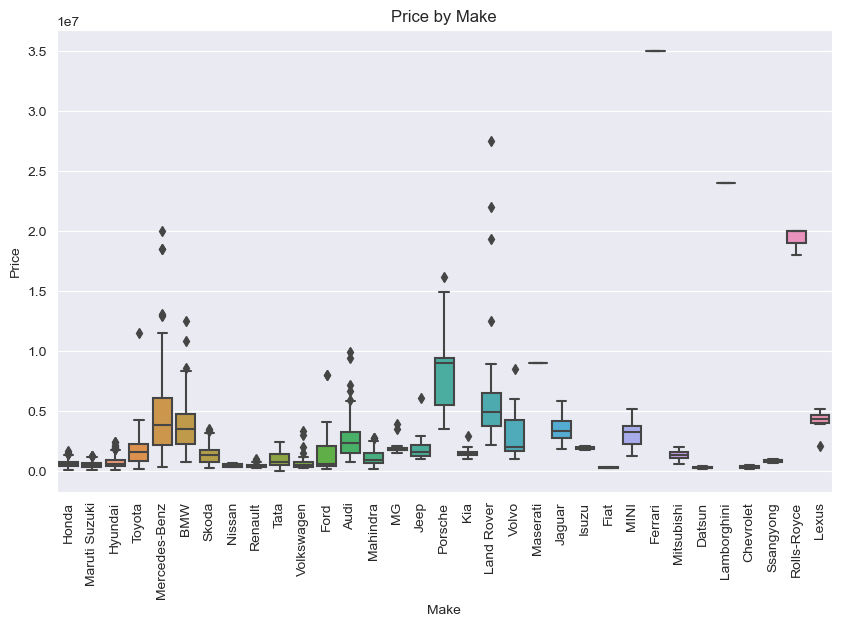

In [22]:
fig = plt.figure(figsize=(10, 6))
sns.boxplot(x='Make', y='Price', data=df)
plt.xticks(rotation=90)
plt.title('Price by Make')
plt.show()

A violin plot allows us to visualize the distribution of car prices for different transmission types, providing insights into price ranges and densities for each category.

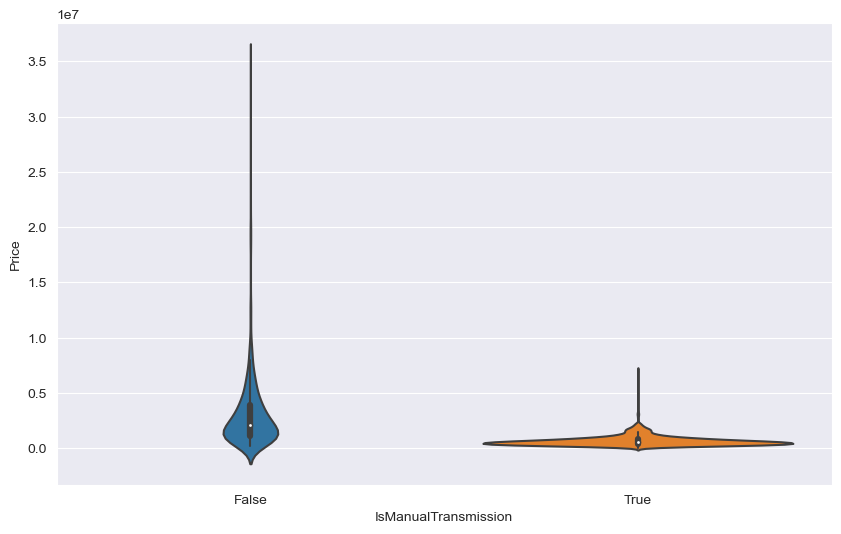

In [23]:
fig = plt.figure(figsize=(10, 6))
sns.violinplot(x='IsManualTransmission', y='Price', data=df)
axes[1, 0].set_title('Price by Transmission')
plt.show()

## 3. Create a Baseline Regression Model

In [24]:
le = LabelEncoder()
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    df[col] = le.fit_transform(df[col].astype(str))

df = pd.get_dummies(df, columns=['Fuel Type', 'AgeBin'])

In [25]:
features = ['Kilometer', 'Age', 'Engine', 'Owner', 'Max Power', 'Max Torque', 'LuxuryBrand', 'IsManualTransmission'] + \
           [col for col in df.columns if col.startswith(('Fuel Type_', 'AgeBin_'))]

X = df[features]
y = df['Price']

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1647, 18), (412, 18), (1647,), (412,))

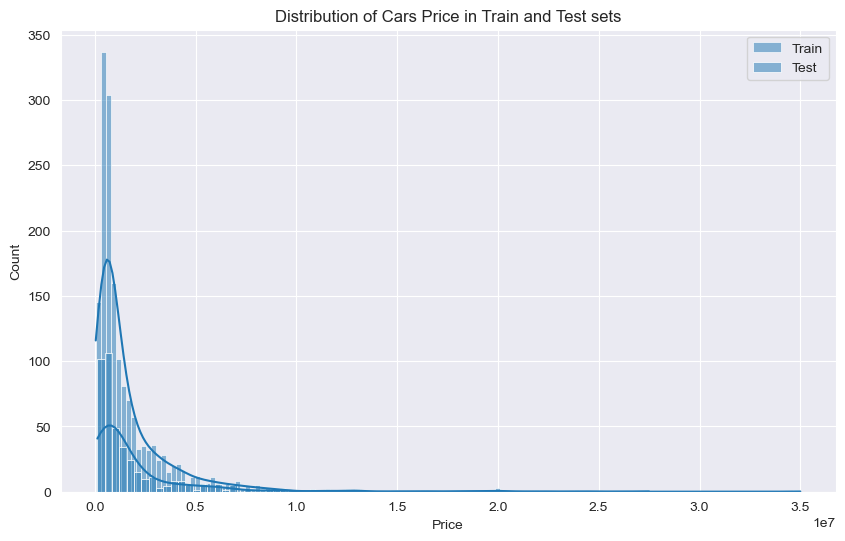

In [27]:
# Price distribution is similar in both the train and test sets
plt.figure(figsize=(10, 6))
sns.histplot(y_train, kde=True, label="Train")
sns.histplot(y_test, kde=True, label="Test")
plt.title("Distribution of Cars Price in Train and Test sets")
plt.legend()
plt.show()

In [28]:
import xgboost as xgb

In [29]:
model = xgb.XGBRegressor(random_state=42)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

## 4. Error Analysis

In [30]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [31]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error, mean_absolute_error

In [32]:
# Let's start with the R2 score
print(f'Train R2 Score: {r2_score(y_train, y_train_pred)}')
print(f'Test R2 Score: {r2_score(y_test, y_test_pred)}')

Train R2 Score: 0.9986081153446694
Test R2 Score: 0.8695347103276926


In [33]:
print("Mean Absolute Perc Error (Σ(|y - pred|/y)/n):","{:,.3f}".format(mean_absolute_percentage_error(y_test, y_test_pred)))
print("Mean Absolute Error (Σ|y - pred|/n):", "{:,.0f}".format(mean_absolute_error(y_test, y_test_pred)))
print("Root Mean Squared Error (sqrt(Σ(y - pred)^2/n)):", "{:,.0f}".format(np.sqrt(mean_squared_error(y_test, y_test_pred))))

## residuals
residuals = y_test - y_test_pred
max_error = residuals.abs().max()
print("Max Error:", "{:,.0f}".format(max_error))

Mean Absolute Perc Error (Σ(|y - pred|/y)/n): 0.180
Mean Absolute Error (Σ|y - pred|/n): 331,271
Root Mean Squared Error (sqrt(Σ(y - pred)^2/n)): 954,708
Max Error: 11,372,756


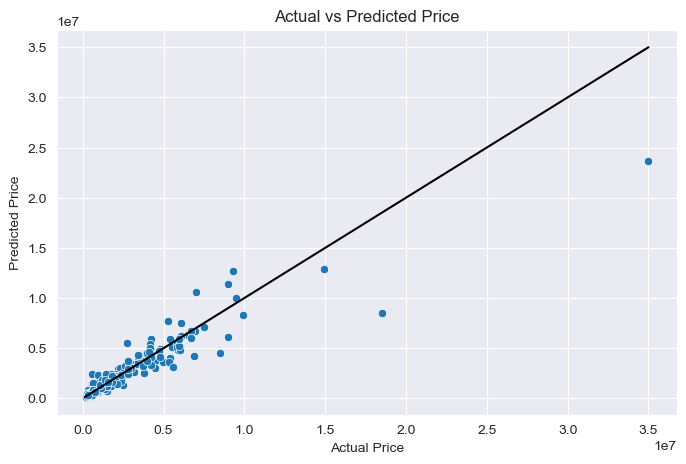

In [34]:
fig, ax = plt.subplots(figsize=(8,5))
sns.scatterplot(y_test, y_test_pred, ax=ax)
sns.lineplot(y_test, y_test, ax=ax, color='black')
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.show()

We can conclude from the graph above that with higher true prices we got larger errors.

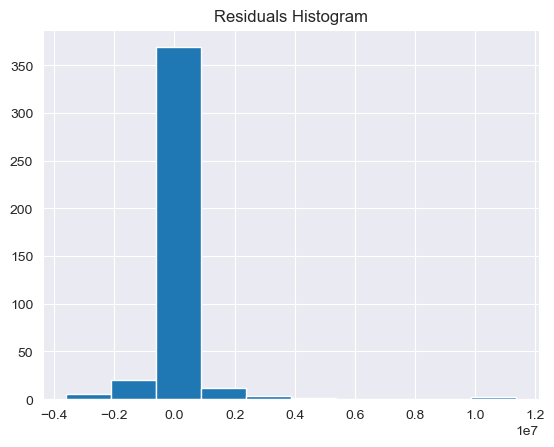

In [35]:
residuals.hist()
plt.title('Residuals Histogram')
plt.show()

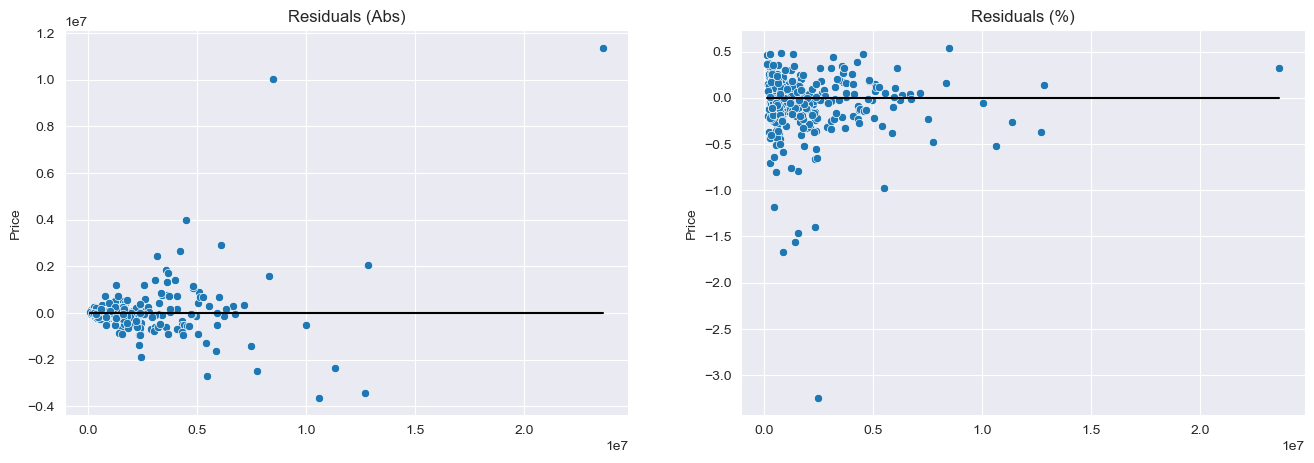

In [36]:
fig, ax = plt.subplots(1, 2, figsize=(16,5))
sns.scatterplot(x=y_test_pred, y=residuals, ax=ax[0])
sns.lineplot(x=y_test_pred, y=0, ax=ax[0], color='black')
ax[0].set_title("Residuals (Abs)")
sns.scatterplot(y_test_pred, residuals / y_test, ax=ax[1])
sns.lineplot(y_test_pred, 0, ax=ax[1], color='black')
ax[1].set_title("Residuals (%)")
plt.show()

In [37]:
rel_res = residuals / y_test
rel_res = rel_res.abs()

How many times did our model achieve low estimation error (error less than 5%)?:

In [38]:
len(rel_res[rel_res < 0.05]) / len(rel_res)

0.25485436893203883

How many times did our model achieve high estimation error (error greater than 20%)?:

In [39]:
len(rel_res[rel_res > 0.2]) / len(rel_res)

0.2766990291262136

From the details above we can see that for almost 50% of the samples, our model's error rate is between 5%-20%.

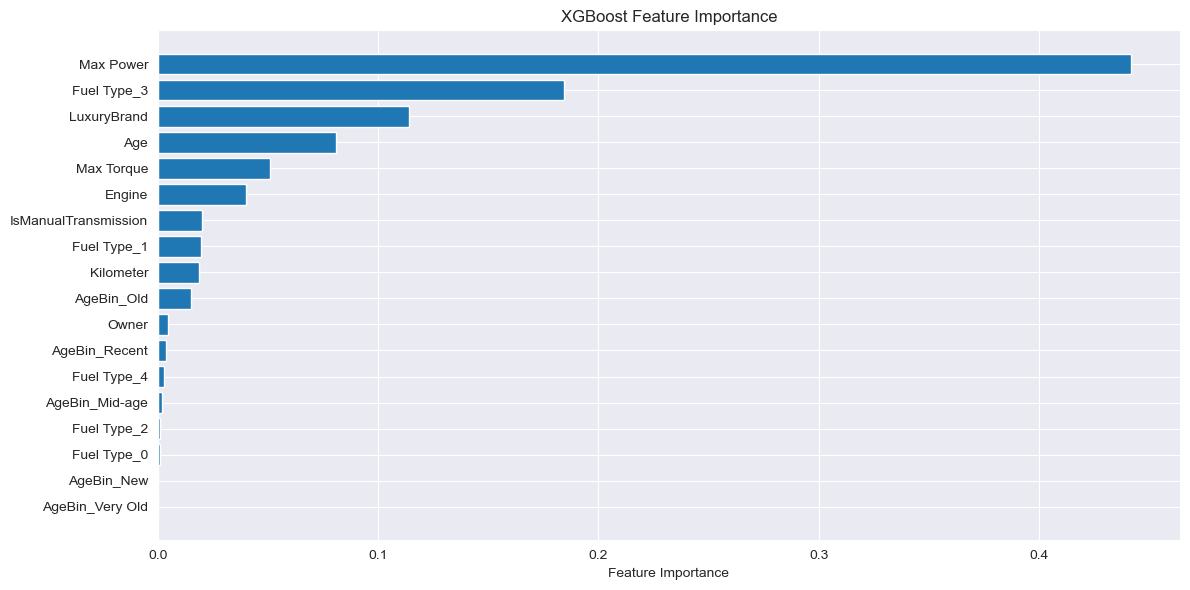

In [40]:
# Feature importance
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

fig, ax = plt.subplots(figsize=(12, 6))
ax.barh(pos, feature_importance[sorted_idx], align='center')
ax.set_yticks(pos)
ax.set_yticklabels(np.array(X.columns)[sorted_idx])
ax.set_xlabel('Feature Importance')
ax.set_title('XGBoost Feature Importance')
plt.tight_layout()
plt.show()

In [41]:
X_test[rel_res > 0.3]['Age'].value_counts()

10.0    8
4.0     7
12.0    7
6.0     6
13.0    6
8.0     5
5.0     5
7.0     4
11.0    4
3.0     3
2.0     3
9.0     3
15.0    2
14.0    2
16.0    2
17.0    1
Name: Age, dtype: int64